In [80]:

import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from lifelines import KaplanMeierFitter

failure_data = pd.read_csv(r'Failure_modelling\Failure_Data\failure_data.csv', index_col=0)
pipe_data = pd.read_csv(r'Failure_modelling\Failure_Data\pipe_data.csv', index_col=0)

In [81]:
def side_by_side_bar(failure_col, pipe_col, title):
    failure_counts = failure_data[failure_col].value_counts(normalize=True)

    pipe_counts = pipe_data[pipe_col].value_counts(normalize=True)

    categories = sorted(set(failure_counts.index) | set(pipe_counts.index))

    failure_counts = failure_counts.reindex(categories, fill_value=0)
    pipe_counts = pipe_counts.reindex(categories, fill_value=0)

    width = 0.35 
    x = range(len(categories))  

    plt.bar(x, failure_counts, width, label='Failure Data')
    plt.bar([i + width for i in x], pipe_counts, width, label='Pipe Data')

    plt.xlabel(f'{title}')
    plt.ylabel('Relative amount')
    plt.title(f'Comparison of {title} Counts')
    plt.xticks([i + width/2 for i in x], categories, rotation='vertical')
    plt.legend()

    plt.tight_layout()
    plt.show()

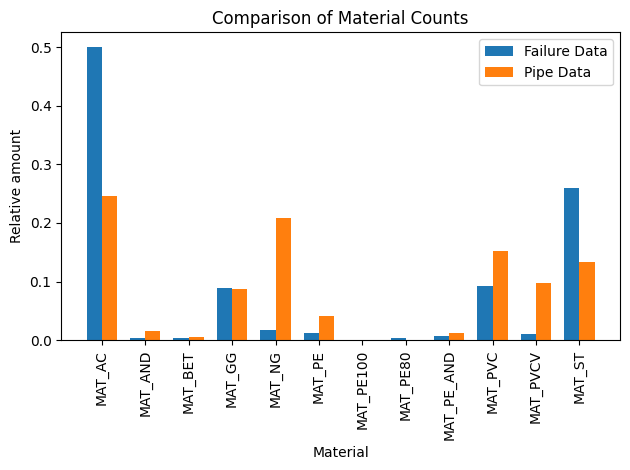

In [82]:
side_by_side_bar('storing_materiaal', 'Materiaalcode', 'Material')

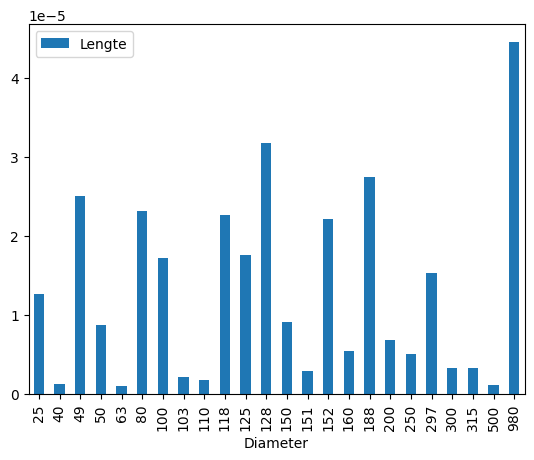

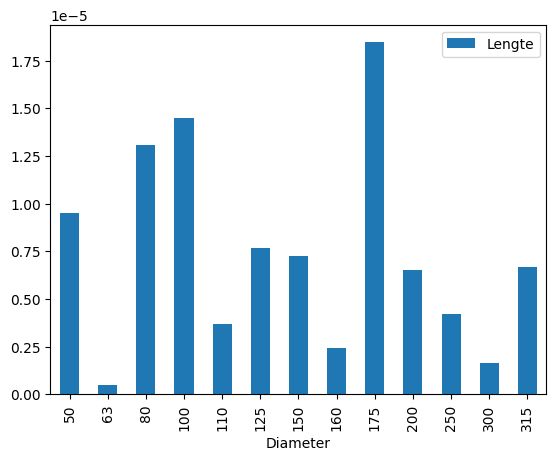

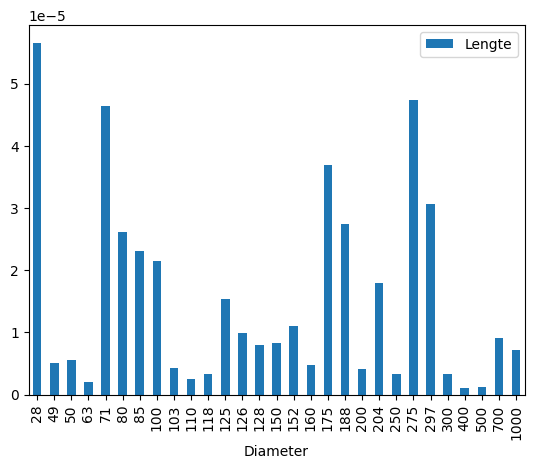

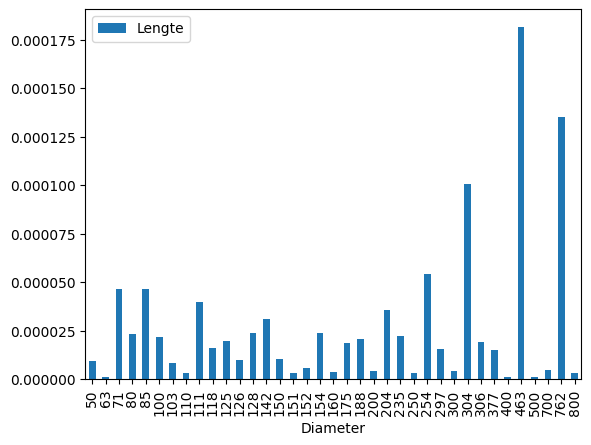

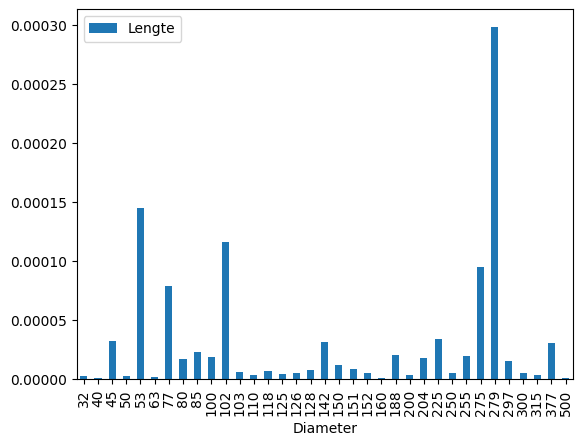

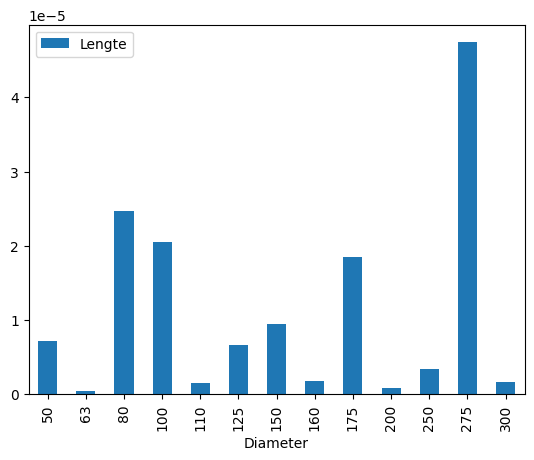

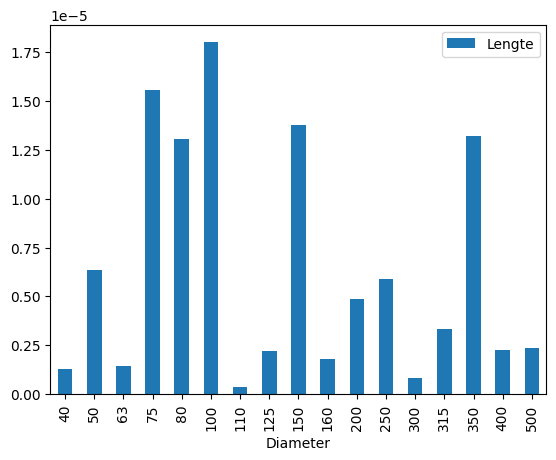

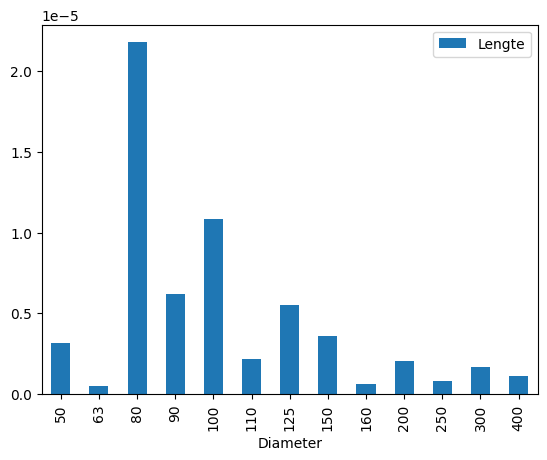

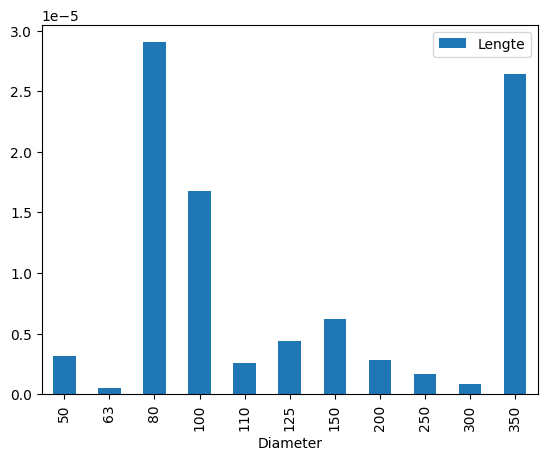

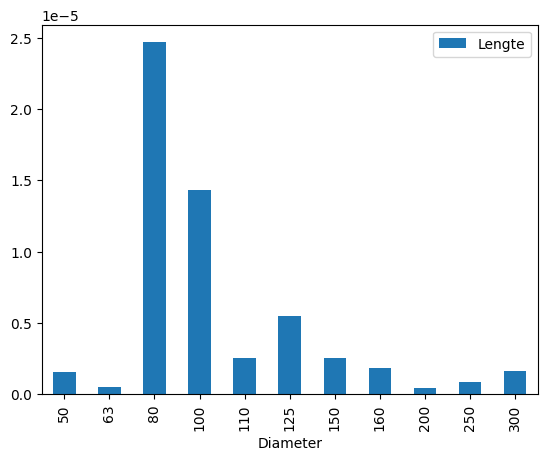

In [83]:
for i in [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    failure_data_year = failure_data[pd.to_datetime(failure_data['storing_melddatum']).dt.year == i]
    pipe_data_year = pipe_data[pd.to_datetime(pipe_data['Aanlegjaar']).dt.year <= i]
    failures = failure_data_year['storing_diameter'].groupby(failure_data_year['storing_diameter']).count()
    length = pipe_data_year['Lengte'].groupby(pipe_data_year['Diameter']).sum()
    a = pd.DataFrame(failures.values / length[length.index.isin(failures.index.values)])
    if not a.empty:
        a.plot(kind='bar')
    

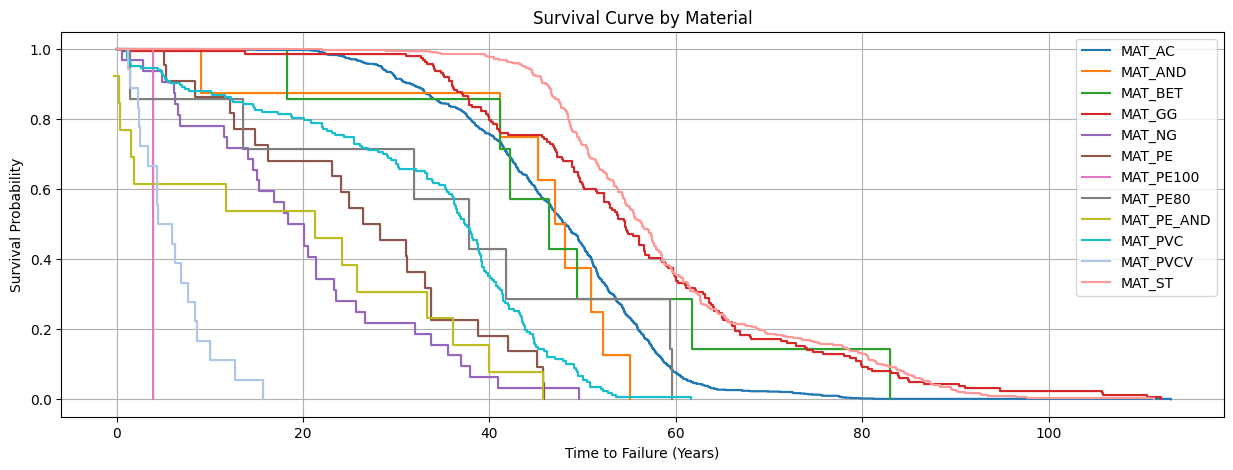

In [107]:
failure_data['Time_to_Failure'] = (pd.to_datetime(failure_data['storing_melddatum']) - pd.to_datetime(failure_data['storing_aanlegjaar'])).dt.days /365.25
kmf = KaplanMeierFitter()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ff9896']

plt.figure(figsize=(15,5))
for i, (material, group) in enumerate(failure_data.groupby('storing_materiaal')):
    kmf.fit(group['Time_to_Failure'], event_observed=(group['storing_melddatum'].notnull()), label=material, alpha=1)
    kmf.plot(color=colors[i])
plt.title('Survival Curve by Material')
plt.xlabel('Time to Failure (Years)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

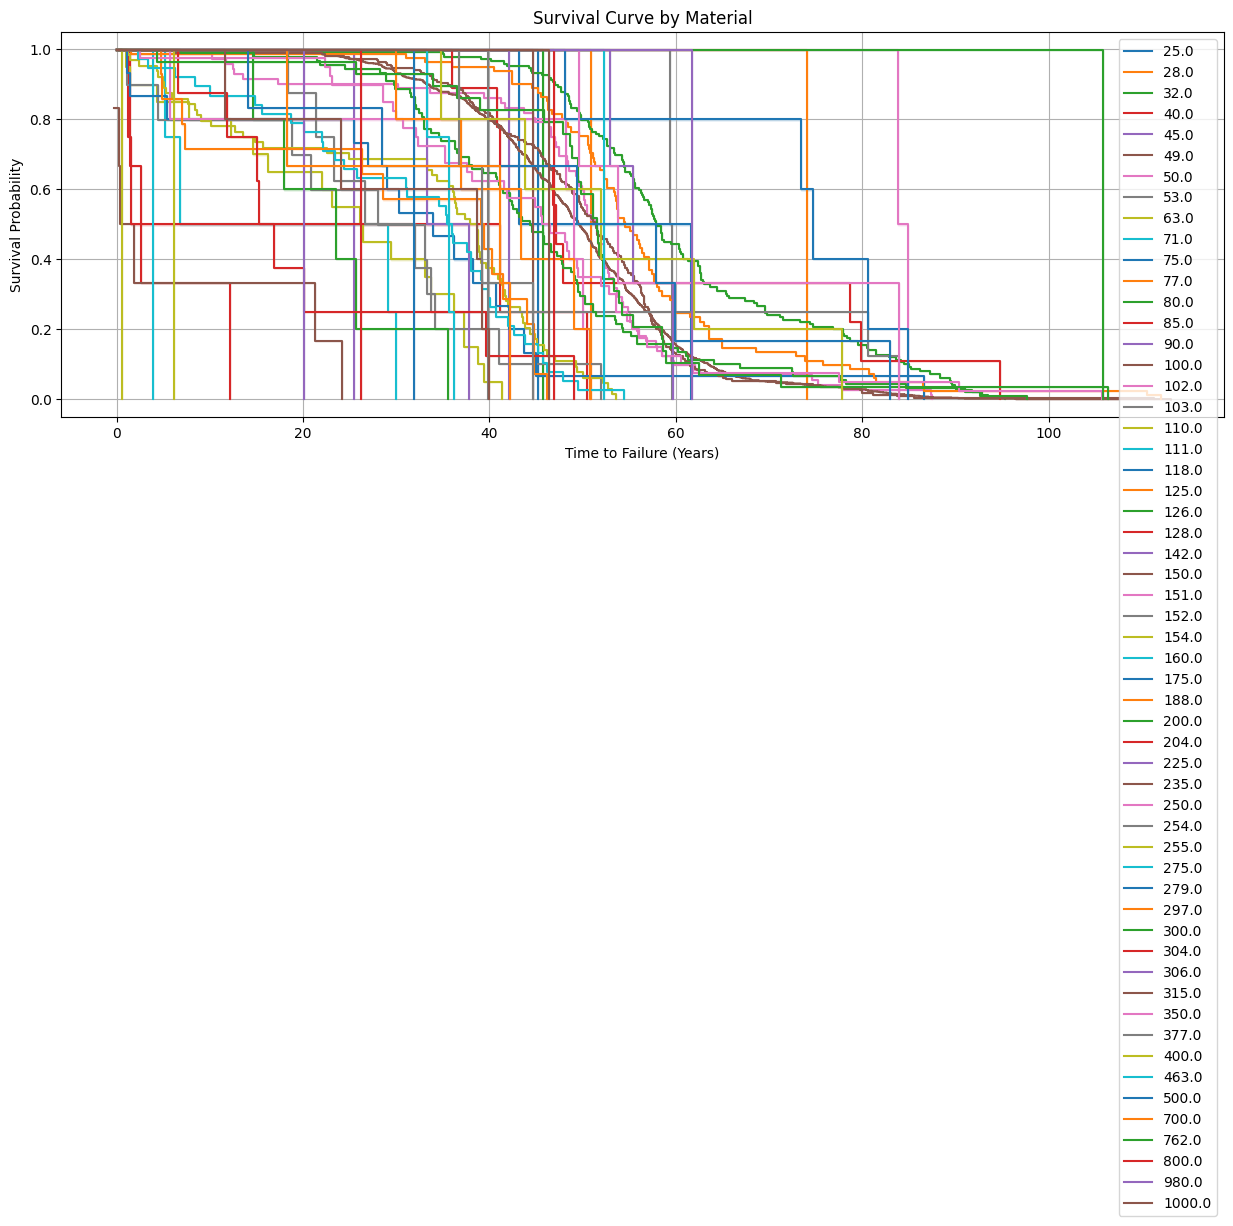

In [109]:
failure_data['Time_to_Failure'] = (pd.to_datetime(failure_data['storing_melddatum']) - pd.to_datetime(failure_data['storing_aanlegjaar'])).dt.days /365.25
kmf = KaplanMeierFitter()

# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ff9896']

plt.figure(figsize=(15,5))
for i, (material, group) in enumerate(failure_data.groupby('storing_diameter')):
    kmf.fit(group['Time_to_Failure'], event_observed=(group['storing_melddatum'].notnull()), label=material, alpha=1)
    kmf.plot()
plt.title('Survival Curve by Material')
plt.xlabel('Time to Failure (Years)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

0       12847
1       20607
2        7359
4       18331
7       17489
        ...  
2305    31072
2306    16048
2307    17052
2308    17143
2309    20931
Name: age_at_failure, Length: 1822, dtype: int64